--- 1. Describe and Info Steps ---

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           39 non-null     float64
 1   latitude            39 non-null     float64
 2   housing_median_age  39 non-null     float64
 3   total_rooms         39 non-null     float64
 4   total_bedrooms      38 non-null     float64
 5   population          39 non-null     float64
 6   households          39 non-null     float64
 7   median_income       39 non-null     float64
 8   median_house_value  39 non-null     float64
 9   ocean_proximity     39 non-null     object 
dtypes: float64(9), object(1)
memory usage: 3.2+ KB
None

Describe:
        longitude   latitude  housing_median_age   total_rooms  \
count   39.000000  39.000000           39.000000     39.000000   
mean  -122.240513  37.836667           44.435897   2281.051282   
s

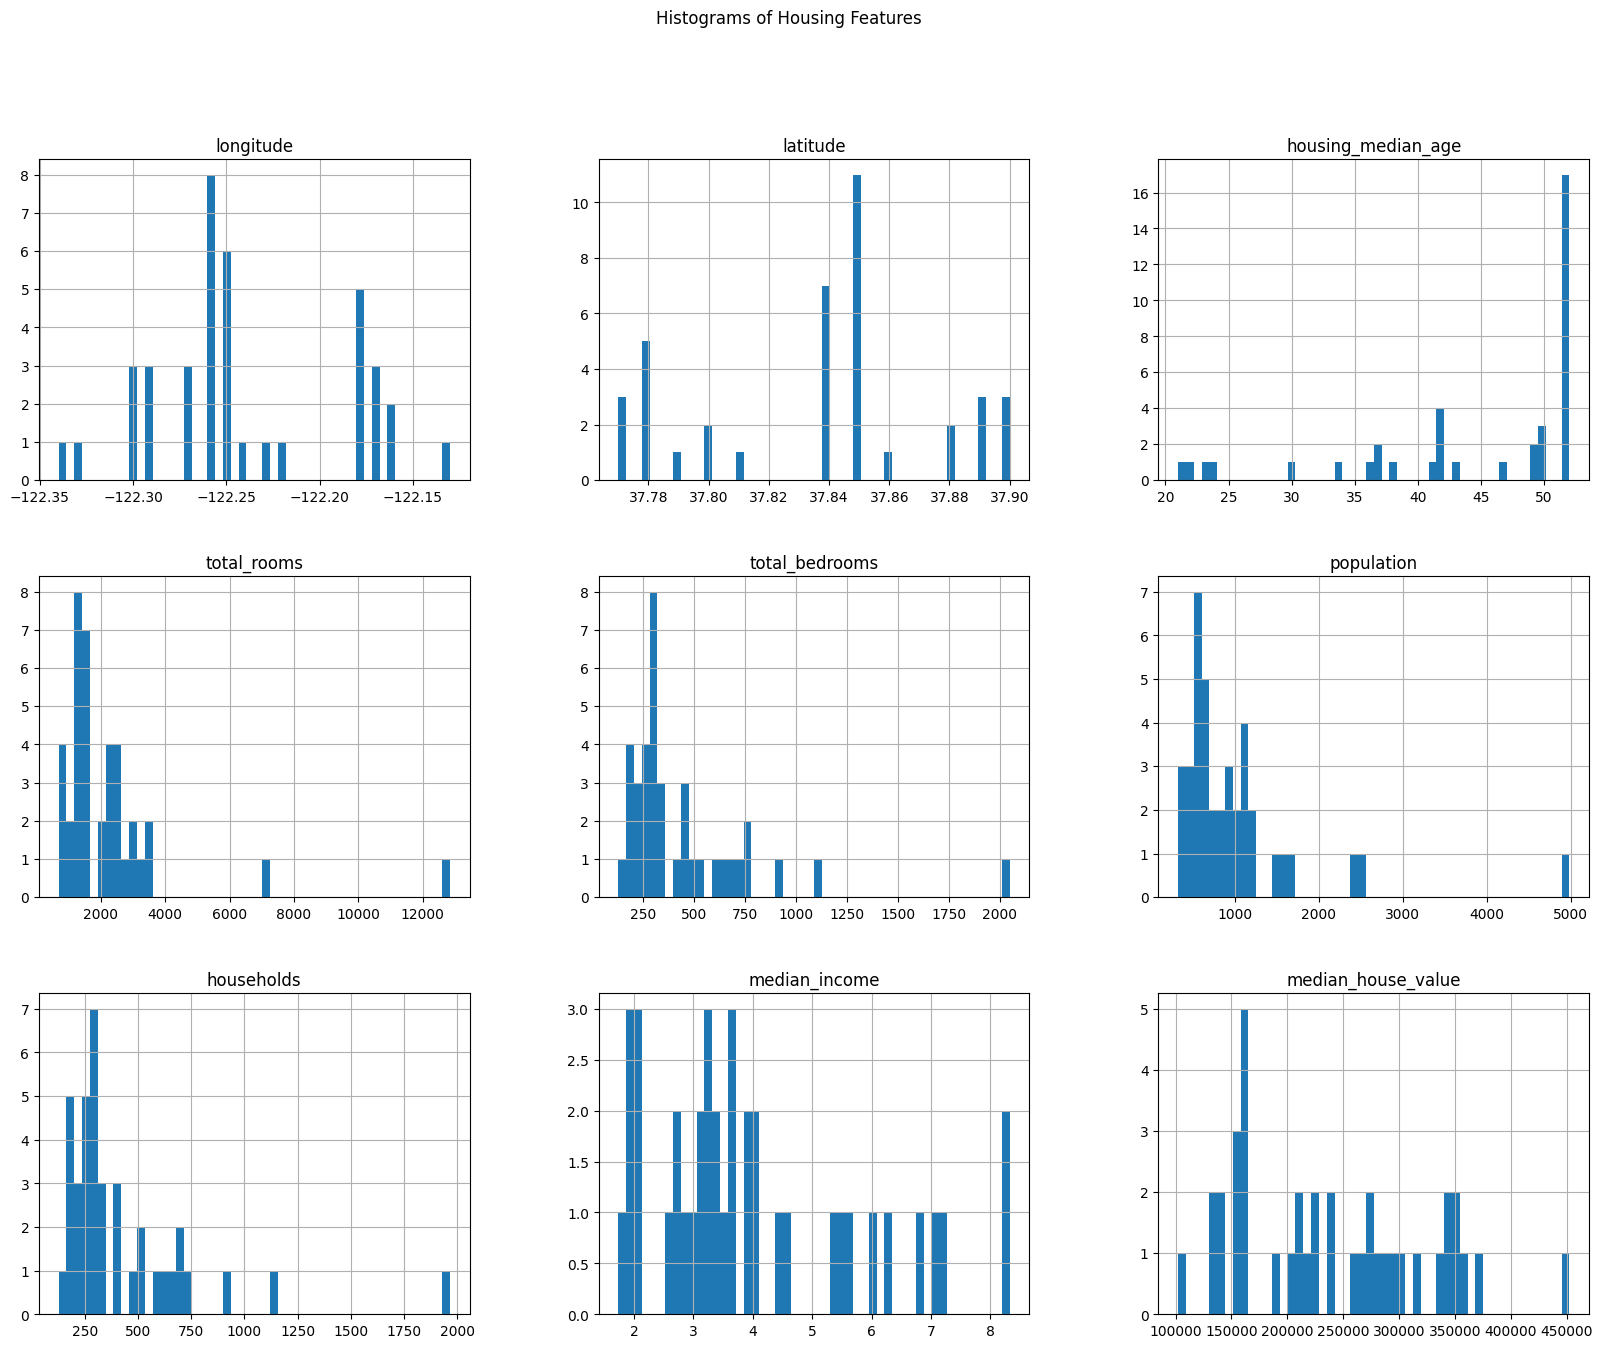


**Interpretation:**
- **Median Income:** The histogram is right-skewed and scaled (e.g., 3 means $30,000). It is capped at 15 (representing $150,000+), which explains the heavy tail at the end.
- **Housing Median Age:** The distribution is relatively uniform but capped at 52 years. There is a noticeable spike at the maximum value, indicating many houses are older than 52 years but were grouped into this specific bin.


--- 3. Test Set Creation (Random vs Stratified) ---
Random Test Set Size: 8
Stratified Test Set Size: 8

**Difference between Random and Stratified Test Set:**
- **Random Splitting:** Divides the data randomly without considering the distribution of specific attributes. While simple, it can introduce sampling bias, especially in small datasets, where the test set might not represent the overall population proportions (e.g., it might under-sample a specific income bracket).
- **Stratified Splitting:** Divides the data such that the proportion of samples for each class (i

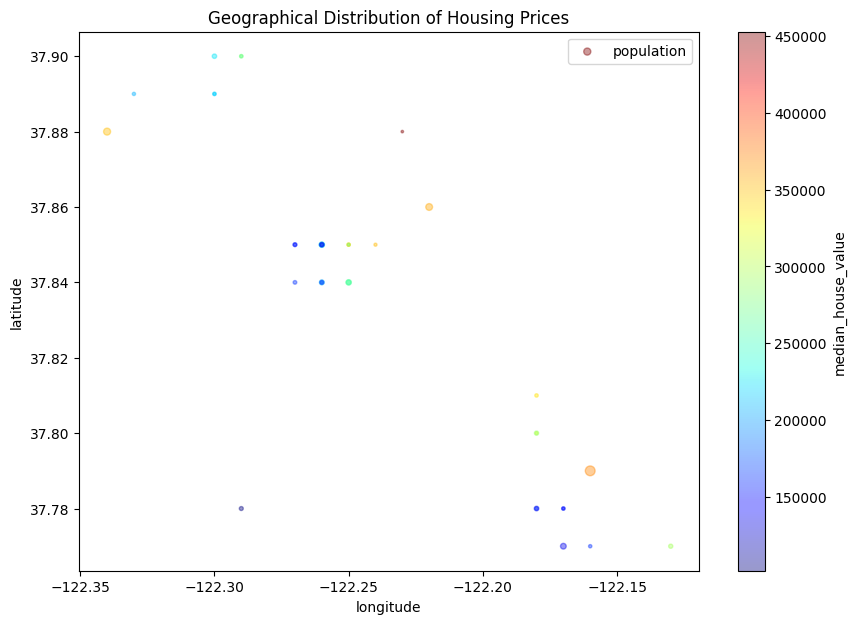


**Graph Indication:**
The graph reveals that housing prices are very much related to location and population density.
- **Price:** High prices (red areas) are concentrated near the coast (ocean) and specific dense urban hubs (like the Bay Area/San Francisco/Los Angeles). Inland areas generally show lower prices (blue areas).
- **Density:** The radius of the circles represents population. High density areas often correlate with higher prices, but not exclusively (some dense inland areas are cheaper).


--- 5. Feature Correlation with Housing Price ---

Correlation with Median House Value:
median_house_value    1.000000
median_income         0.710328
total_rooms           0.319408
latitude              0.301761
population            0.258004
households            0.248083
total_bedrooms        0.220610
longitude             0.040935
housing_median_age   -0.304080
Name: median_house_value, dtype: float64

Feature that correlates the most with Housing Price: median_income


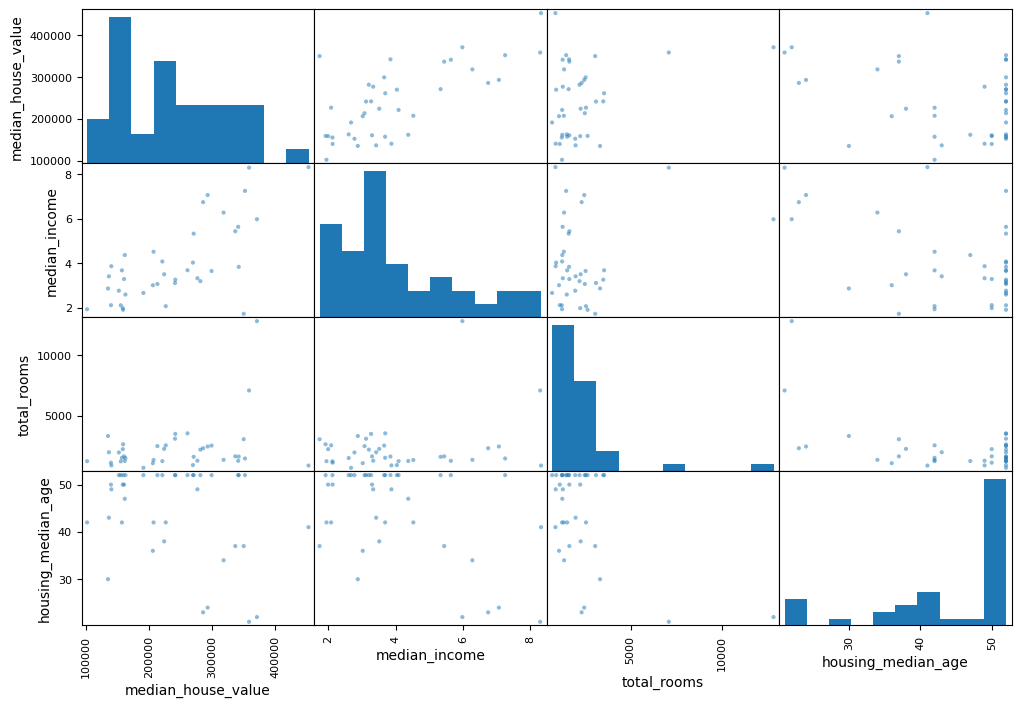

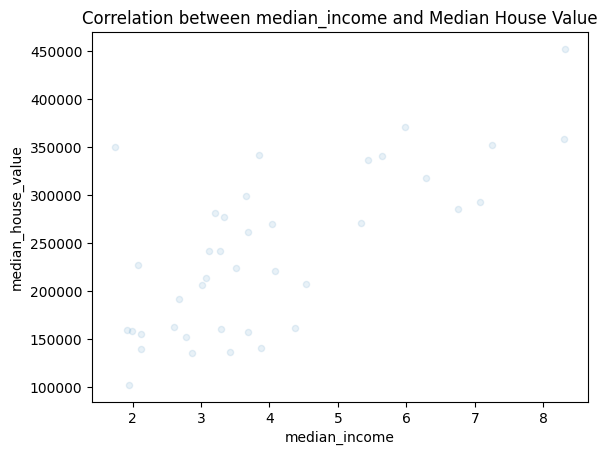


**Analysis of Max Correlation Graph (Median Income vs Price):**
The graph shows a strong positive correlation: as median income increases, the median house value tends to increase.
- There is a visible cap at $500,001 (a horizontal line), which is likely due to data censoring or the maximum value being clipped in the dataset.
- The data points are relatively tight around the trend line up to the cap, confirming `median_income` is a good predictor.


--- 6. Feature Combination & Improved Correlation ---
Features to combine: total_rooms, total_bedrooms, population, households

New Correlation with Median House Value (Combinations):
median_house_value          1.000000
median_income               0.710328
rooms_per_household         0.533722
total_rooms                 0.319408
latitude                    0.301761
population                  0.258004
households                  0.248083
total_bedrooms              0.220610
population_per_household    0.052372
longitude                   

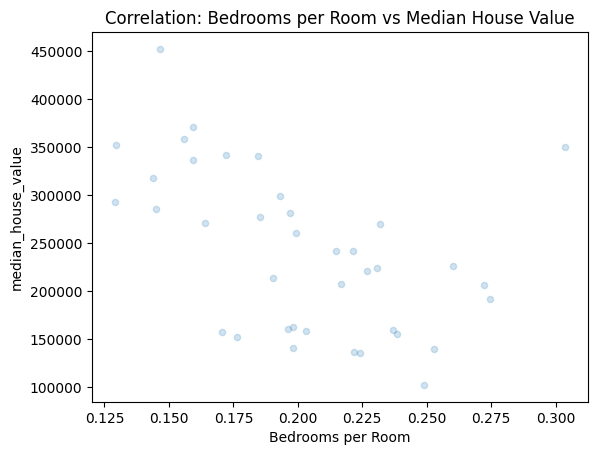


**Observation:**
The new attribute `bedrooms_per_room` has a much stronger negative correlation (-0.25) with the median house value than `total_rooms` or `total_bedrooms` individually.
- This implies that houses with a lower bedroom/room ratio (i.e., larger kitchens, living rooms) tend to be more expensive.


--- 7. Cleaning Features ---
Feature needing cleaning: 'total_bedrooms' (contains missing values)

Null values in 'total_bedrooms' after cleaning: 0

--- 8. Categorical Data Conversion ---
Categories found: [array(['NEAR BAY', 'NEAR OCEAN'], dtype=object)]
Sample encoded row (One-Hot): [1. 0.]

--- 9. Importance of Feature Scaling ---

Feature scaling is crucial because Machine Learning algorithms do not perform well 
when the input numerical attributes have very different scales.

- In this dataset, 'total_rooms' ranges from 6 to 39,320, while 'median_income' only ranges roughly from 0 to 15.
- Without scaling, features with larger magnitudes (like total_rooms) might dominate th

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from zlib import crc32
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

housing = pd.read_csv('/content/housing.csv', sep='|')

print("--- 1. Describe and Info Steps ---")
# Info
print("\nInfo:")
print(housing.info())

# Describe
print("\nDescribe:")
print(housing.describe())

print("\n--- 2. Plot Histogram of each feature ---")
housing.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms of Housing Features")
plt.show()

print("""
**Interpretation:**
- **Median Income:** The histogram is right-skewed and scaled (e.g., 3 means $30,000). It is capped at 15 (representing $150,000+), which explains the heavy tail at the end.
- **Housing Median Age:** The distribution is relatively uniform but capped at 52 years. There is a noticeable spike at the maximum value, indicating many houses are older than 52 years but were grouped into this specific bin.
""")

print("\n--- 3. Test Set Creation (Random vs Stratified) ---")

# Random Split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Stratified Split based on Median Income
# We first create an income category to stratify by
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Drop the temporary income_cat column
for set_ in (strat_train_set, strat_test_set, housing):
    set_.drop("income_cat", axis=1, inplace=True)

print("Random Test Set Size:", len(test_set))
print("Stratified Test Set Size:", len(strat_test_set))

print("""
**Difference between Random and Stratified Test Set:**
- **Random Splitting:** Divides the data randomly without considering the distribution of specific attributes. While simple, it can introduce sampling bias, especially in small datasets, where the test set might not represent the overall population proportions (e.g., it might under-sample a specific income bracket).
- **Stratified Splitting:** Divides the data such that the proportion of samples for each class (in this case, income category) is the same in both the train and test sets as it is in the original dataset. This ensures that the test set is representative of the whole population, reducing sampling bias.
""")

print("\n--- 4. Geographical Features & Visualization ---")
# List geographical features
print("Geographical Features:", ['longitude', 'latitude'])

# Plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.title("Geographical Distribution of Housing Prices")
plt.show()

print("""
**Graph Indication:**
The graph reveals that housing prices are very much related to location and population density.
- **Price:** High prices (red areas) are concentrated near the coast (ocean) and specific dense urban hubs (like the Bay Area/San Francisco/Los Angeles). Inland areas generally show lower prices (blue areas).
- **Density:** The radius of the circles represents population. High density areas often correlate with higher prices, but not exclusively (some dense inland areas are cheaper).
""")

print("\n--- 5. Feature Correlation with Housing Price ---")

# Calculate Correlation
corr_matrix = housing.corr(numeric_only=True)
print("\nCorrelation with Median House Value:")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Maximum correlation feature
max_corr_feature = corr_matrix["median_house_value"].drop("median_house_value").idxmax()
print(f"\nFeature that correlates the most with Housing Price: {max_corr_feature}")

# Plot Scatter Matrix for top attributes
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

# Specific plot for max correlation
housing.plot(kind="scatter", x=max_corr_feature, y="median_house_value", alpha=0.1)
plt.title(f"Correlation between {max_corr_feature} and Median House Value")
plt.show()

print("""
**Analysis of Max Correlation Graph (Median Income vs Price):**
The graph shows a strong positive correlation: as median income increases, the median house value tends to increase.
- There is a visible cap at $500,001 (a horizontal line), which is likely due to data censoring or the maximum value being clipped in the dataset.
- The data points are relatively tight around the trend line up to the cap, confirming `median_income` is a good predictor.
""")

print("\n--- 6. Feature Combination & Improved Correlation ---")

# List features to combine
print("Features to combine: total_rooms, total_bedrooms, population, households")

# Create combined attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

# Check new correlation
corr_matrix = housing.corr(numeric_only=True)
print("\nNew Correlation with Median House Value (Combinations):")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Plot the new attribute with better correlation (usually bedrooms_per_room)
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.2)
plt.title("Correlation: Bedrooms per Room vs Median House Value")
plt.xlabel("Bedrooms per Room")
plt.show()

print("""
**Observation:**
The new attribute `bedrooms_per_room` has a much stronger negative correlation (-0.25) with the median house value than `total_rooms` or `total_bedrooms` individually.
- This implies that houses with a lower bedroom/room ratio (i.e., larger kitchens, living rooms) tend to be more expensive.
""")

print("\n--- 7. Cleaning Features ---")

# Identify features to clean
print("Feature needing cleaning: 'total_bedrooms' (contains missing values)")

# Demonstrate cleaning using SimpleImputer
imputer = SimpleImputer(strategy="median")

# Remove ocean_proximity to fit imputer (as it only works on numerical data)
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit imputer to the data
imputer.fit(housing_num)

# Transform the data
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

# Verify no nulls exist
print("\nNull values in 'total_bedrooms' after cleaning:", housing_tr["total_bedrooms"].isnull().sum())

print("\n--- 8. Categorical Data Conversion ---")

# Identify categorical data
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat = housing[["ocean_proximity"]]

# Method: One-Hot Encoding
# Explanation: Converts categorical text values into binary vectors.
# For "NEAR BAY", it creates a column with 1 for that row and 0 for others.
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print("Categories found:", cat_encoder.categories_)
print("Sample encoded row (One-Hot):", housing_cat_1hot[0])

print("\n--- 9. Importance of Feature Scaling ---")
print("""
Feature scaling is crucial because Machine Learning algorithms do not perform well
when the input numerical attributes have very different scales.

- In this dataset, 'total_rooms' ranges from 6 to 39,320, while 'median_income' only ranges roughly from 0 to 15.
- Without scaling, features with larger magnitudes (like total_rooms) might dominate the distance calculations
(in algorithms like KNN or SVM) or cause gradient descent to oscillate and take longer to converge (in Neural Networks/Linear Regression).
- Two common methods are Min-Max Scaling (normalization) and Standardization (subtract mean, divide by variance).
""")

print("\n--- 10. Pipeline Design (Custom Transform, Scaling, Encoding) ---")

# Custom Transformer for Combined Attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Assuming specific column indices based on housing_num structure
        # Index 3: total_rooms, 4: total_bedrooms, 5: population, 6: households
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Pipeline for Numerical Attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# Full Pipeline using ColumnTransformer
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Prepare Data
# Note: We drop the labels (median_house_value) to prepare features
housing_labels = housing["median_house_value"].copy()
housing_prepared = full_pipeline.fit_transform(housing)

print("Pipeline executed successfully.")
print("Shape of prepared data:", housing_prepared.shape)
print("\n**Explanation:**")
print("""
1. **Custom Transform (`CombinedAttributesAdder`)**: This class takes the numerical inputs and injects new combined features (like rooms_per_household) into the data array.
2. **ColumnTransformer**: It directs the flow:
   - Numerical columns go to the `num_pipeline`.
   - Categorical columns go directly to `OneHotEncoder`.
3. **Num Pipeline**:
   - `SimpleImputer`: Fills missing values with median.
   - `attribs_adder`: Runs our custom class to add new columns.
   - `std_scaler`: Scales all numerical values to have mean=0 and variance=1.
4. **Output**: A fully processed NumPy array ready for Machine Learning models.
""")